#### Project:

1. Use the predictors(Cylinders,Weight,Horsepower) to fit a kNN model to find y(MPG) (choose appropriate values of k using CV)
2. Fit linear regression on the same data. Use CV to validate the model.
3. Fit decision tree on the same data. Use CV to validate the model.
4. Choose the best competing models for testing
5. Report the best performing model.


GIVE EXPLANATIONS

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#for test-train split
from sklearn.model_selection import train_test_split

#for fitting KNN
from sklearn.neighbors import KNeighborsRegressor

#for fitting LinearRegression
from sklearn.linear_model import LinearRegression

#for fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#to compute cross validation score
from sklearn.model_selection import cross_val_score

### Reading data

In [2]:
cars = pd.read_csv('cars.csv')                #reading csv file
X = cars[['Cylinders','Weight','Horsepower']] #assigning predictors
y = cars['MPG']                               #assigning target variable

### Train_test_split

In [3]:
#using 70-30 train-test split and later use cross validation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) 

### KNN model

#### Range of k values are passed on to find the cv_scores(MAE) and the optimum k-value is determined. 

As the length of the training data is around 284, 15 *(at all iteration, 93% is used for training data and 7% is used for validating data)* is used as cv value to predict MAE

In [4]:
#Using cross-validation to choose optimal k for kNN
neighbors = list(range(1,250))

#empty list that will hold cv_scores
cv_scores=[]

#perform 15-fold cross validation to find cv_score(MAE)
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv=15,scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

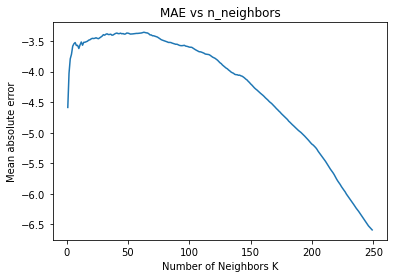

In [5]:
#plot neg_mean_absolute_error vs k
plt.plot(neighbors,cv_scores)
plt.title('MAE vs n_neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean absolute error')
plt.show()

In [6]:
#finding the minimum MAE
np.max(cv_scores) #since negative MAE is calculated, np.max is used

-3.357912682941923

In [7]:
np.argsort(cv_scores) #sorting the index in ascending order of cv_scores and getting the index of minimum MAE

array([248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236,
       235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223,
       222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210,
       209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197,
       196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184,
       183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171,
       170,   0, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159,
       158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146,
       145, 144, 143, 142, 141, 139, 140, 138, 137, 136, 135,   1, 134,
       133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121,
         2, 120, 119, 118, 117, 116, 115, 114,   3, 113, 112, 111, 110,
       109, 108, 107, 106, 105, 104, 103,   9, 102, 101, 100,  99,  98,
        97,   4,  96,  93,  92,   7,  94,  91,  95,   8,  12,  90,  10,
        88,  89,  87,   5,  86,  85,   6,  84,  82,  83,  13,  1

In [8]:
cv_scores[62] #cross check the value of cv_score at that index

-3.357912682941923

### Error is minimum at k=63

### Linear Regression model

#### Linear regression gives us a single equation to predict the target variable and the variance in the predicted value can be high. 

*As the number of predictors considered are less in this dataset, it is preferrable to use KNN or Decision Tree as both of them give a more accurate value and the cv_score(MAE) calcuated in these models is also proving us the same*

In [9]:
lr = LinearRegression() #fitting linear regression model

In [10]:
#finding cv_scores(MAE)
cv_scores = []
scores = cross_val_score(lr,X_train,y_train,cv=15,scoring='neg_mean_absolute_error')
cv_scores.append(scores.mean())

In [11]:
cv_scores

[-3.6980682234109366]

### Regression Decision Tree

#### Range of depth and leaf values are passed on to find the cv_scores(MAE) and the optimum (depth,leaf) value is found out. 
 

In [12]:
#creating a list to assume values of depth and sample leaf
depth = list(range(1,11))
leaf = list(range(1,11))

In [13]:
#creating a tuple to have all combinations of the assumed depth and sample leaf
tup = [(x,y) for x in depth for y in leaf]
tup
len(tup)

100

In [14]:
#ceating a array of numbers to use it as X-axis in graph and taking the relevant tuple based on minimum error
base = np.arange(0,100,1)
len(base)

100

In [15]:
#finding cv_scores(MAE) for all assumed values of depth and sample leaf
cv_scores=[]
for i in tup:
    reg = DecisionTreeRegressor(max_depth = i[0],min_samples_leaf = i[1])
    scores = cross_val_score(reg, X_train, y_train, cv=15, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())


In [16]:
len(cv_scores)

100

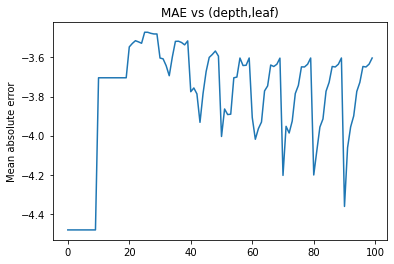

In [17]:
#plot neg_mean_absolute_error vs base(i.e,.max_depth,min_samples_leaf)
plt.plot(base,cv_scores)
plt.title('MAE vs (depth,leaf)')
plt.ylabel('Mean absolute error')
plt.show()

In [18]:
#finding the minimum MAE
np.max(cv_scores) #since negative MAE is calculated, np.max is used

-3.4707493412908965

In [19]:
np.argsort(cv_scores) #sorting the index in ascending order of cv_scores and getting the index of minimum MAE

array([ 9,  1,  2,  3,  4,  5,  6,  7,  8,  0, 90, 70, 80, 81, 91, 61, 50,
       72, 62, 82, 92, 71, 43, 63, 73, 83, 60, 93, 52, 53, 51, 42, 74, 44,
       40, 94, 84, 64, 41, 65, 75, 85, 95, 54, 14, 19, 16, 11, 10, 13, 17,
       18, 12, 15, 55, 33, 45, 97, 87, 77, 76, 67, 86, 96, 32, 57, 58, 66,
       68, 88, 78, 98, 31, 69, 56, 30, 79, 99, 59, 89, 46, 34, 49, 47, 48,
       20, 38, 21, 24, 37, 23, 35, 36, 39, 22, 29, 28, 27, 26, 25],
      dtype=int64)

In [20]:
cv_scores[25] #cross check the value of cv_score at that index

-3.4707493412908965

In [21]:
tup[25] #getting the value of depth and sample leaf from the created tuple

(3, 6)

#### Error is minimum at depth = 3 & min_samples_leaf = 6

The drop in cv_score is negligible if the depth value(for all values of leaf) is taken more than 7. 
The same can be observed in the plotted MAE vs (depth,leaf) graph. 



Hence the cv_score(MAE) was checked for depth & leaf values in the range (1 to 10)

## Conclusion:

CV score(MAE) is almost in the same range for both KNN and Regression-Decision Tree (for different values of training data).


So both the models are chosen for testing.

### Testing the Models (KNN & Decision Tree)

In [22]:
#KNN
start = time.time()                                       #start time is noted
knn = KNeighborsRegressor(n_neighbors=48)                 #knn model is initiated using the k-value as found before
knn.fit(X_train,y_train)                                  #fitting the model
y_pred = knn.predict(X_test)                              #predicting the target variable
print('MAE: ',np.mean(np.abs((np.array(y_test)-y_pred)))) #calculating performance metric(MAE)
stop = time.time()                                        #stop time is noted
print('Time taken: '+str(stop-start)+ ' secs')            #time taken to run the model is calculated


MAE:  3.6008025956284158
Time taken: 0.005495786666870117 secs


In [23]:
#Regression Decision Tree
start = time.time()                                              #start time is noted
rdt = DecisionTreeRegressor(max_depth = 3,min_samples_leaf = 9)  #decision tree model is initiated using depth and sample leaf value as found before
rdt.fit(X_train,y_train)                                         #fitting the model
y_pred = rdt.predict(X_test)                                     #predicting the target variable
print('MAE: ',np.mean(np.abs((np.array(y_test)-y_pred))))        #calculating performance metric(MAE)
stop = time.time()                                               #stop time is noted
print('Time taken: '+str(stop-start)+ ' secs')                   #time taken to run the model is calculated

MAE:  3.582419798760846
Time taken: 0.0053751468658447266 secs


## Final Inference:

For the calculated hyperparameters, Decision Tree runs faster . Also Decision Tree ensures homogeneity in the target variable. Hence Decision Tree is the best performing model for the considered predictors and target variable!!!